In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [5]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [6]:
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [7]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
       
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
    return W

In [8]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

### Задача 1
Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ).  
Сделайте вывод




In [9]:
n = 16
alpha_list = np.logspace(-3, 2, n)
coeffs = np.zeros((n, X_st.shape[1]))

for i, val in enumerate(alpha_list):
    w = gradient_descent_reg_l2(X_st, y, iterations=50, eta=1e-2, reg=val)
    coeffs[i, :] = w

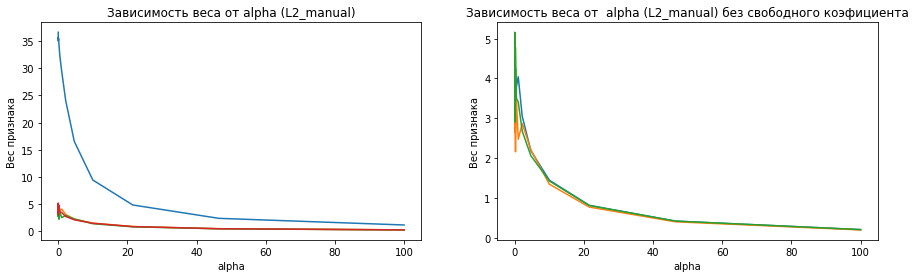

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
ax1, ax2 = axs


for i in range(X_st.shape[1]):
    ax1.plot(alpha_list, coeffs[:, i])

ax1.title.set_text('Зависимость веса от alpha (L2_manual)')
ax1.set_xlabel('alpha')
ax1.set_ylabel('Вес признака');

for i in range(1, X_st.shape[1]):
    ax2.plot(alpha_list, coeffs[:, i])

ax2.title.set_text('Зависимость веса от  alpha (L2_manual) без свободного коэфициента')
ax2.set_xlabel('alpha')
ax2.set_ylabel('Вес признака');

### Вывод
Как видно на графиках выше чем больше значение коэфициента регуляризации, тем ниже абсалютное значение веса признака.
При этом чем выше изначальный вес тем стремительней падение.
Несмотря на это, на начальных этапах можно заметить колебания веса в большую сторону относительного предыдущего значения, что может говорить о необходимости определения оптимально большого количества шагов для приведения веса к стабильно низким значениям.

### Задача 2
Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [11]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
       
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
    return W

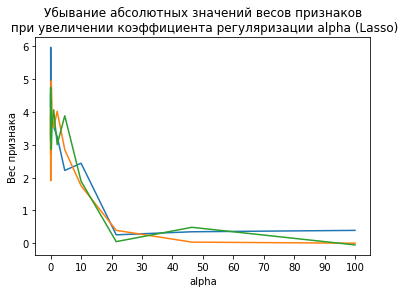

In [12]:
n = 16
alpha_list = np.logspace(-3, 2, n)
coeffs = np.zeros((n, X_st.shape[1]))

for i, val in enumerate(alpha_list):
    w = gradient_descent_reg_l1(X_st, y, iterations=50, eta=1e-2, reg=val)
    coeffs[i, :] = w

for i in range(1, X_st.shape[1]):
    plt.plot(alpha_list, coeffs[:, i])
    
    
plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Lasso)')
plt.xticks(np.arange(0, 101, 10))
plt.xlabel('alpha')
plt.ylabel('Вес признака');

### Задача 3
*Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Думаю можно, например в случаях применения нескольких моделей:
1. Например если используются линейная модель, опирающаяся на нормальное распределение
2. Модели опирающиеся на расстояние, для которых важно чтобы величина одного признака не привалировала над остальными с распределеными в меньшем диапазоне.

### Задача 4
*Сгенерируйте датасет при помощи sklearn.datasets.make_regression и  
обучите линейную модель при помощи градиентного и стохастического градиентного спуска.  
Нанесите среднеквадратичную ошибку для обоих методов на один график,  
сделайте выводы о разнице скорости сходимости каждого из методов.

In [13]:
X, Y, coef = make_regression(n_samples=1000, n_features=2, n_informative=2, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
X[:, 0] *= 10

In [14]:
def grafient_descent(X, y, w, lr=0.01, max_iter=100):
    n = y.shape[0]
    w_list = []
    errors = []
    
    # критерий сходимости (разница весов, при которой алгоритм останавливается)
    min_weight_dist = 1e-8
    
    # зададим начальную разницу весов большим числом
    weight_dist = np.inf

    # счетчик итераций
    iter_num = 0
    
    while weight_dist > min_weight_dist and iter_num < max_iter:
        y_pred = np.dot(X, w)
       
        new_w = w - lr * 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        
        weight_dist = np.linalg.norm(new_w - w, ord=2)
        error = mserror(X, new_w, Y)
        w_list.append(new_w.copy())
        errors.append(error)
        iter_num += 1
        w = new_w
        
    return w, w_list, errors

In [15]:
def stocashic_grafient_descent(X, y, w, lr=0.01, max_iter=100):
    n =  y.shape[0]
    w_list = []
    errors = []
    
    # критерий сходимости (разница весов, при которой алгоритм останавливается)
    min_weight_dist = 1e-5
    
    # зададим начальную разницу весов большим числом
    weight_dist = np.inf

    # счетчик итераций
    iter_num = 0
    
    np.random.seed(911)
    
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # генерируем случайный индекс объекта выборки
        train_ind = np.random.randint(X.shape[0], size=1)
        y_pred = np.dot(X[train_ind], w)
        
        new_w = w - lr * 2 /n * X[train_ind].T @ (y_pred - Y[train_ind])
        
        weight_dist = np.linalg.norm(new_w - w, ord=2)
        error = mserror(X, new_w, Y)
        w_list.append(new_w.copy())
        errors.append(error)
        iter_num += 1
        w = new_w
        
    return w, w_list, errors

In [16]:
gd_w, gd_w_list, gd_errors = grafient_descent(X, Y, coef)
sgd_w, sgd_w_list, sgd_errors = stocashic_grafient_descent(X, Y, coef, lr=0.1, max_iter=250)

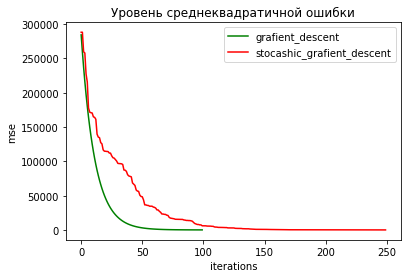

In [17]:
plt.title('Уровень среднеквадратичной ошибки')
plt.xlabel('iterations')
plt.ylabel('mse');

plt.plot(range(len(gd_errors)), gd_errors, color='green', label='grafient_descent')
plt.plot(range(len(sgd_errors)), sgd_errors, color='red', label='stocashic_grafient_descent')
plt.legend()
plt.show()

### Вывод
При использовании градиентного спуска скорость снижения ошибки выше чем при использовании стохастического градиентного спуска.